# Exploratory Data Analysis

---

1. Import packages
2. Loading data with Pandas
3. Explore the Data

---

## 1.) Import packages

In [48]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import os

# Shows plots in jupyter notebook
%matplotlib inline

In [50]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("bright")
plt.rcParams['figure.figsize'] = [12, 6]

---
## 2.) Loading data with Pandas

In [51]:
df = pd.read_csv('../data/raw_data/amazon_alexa.tsv', delimiter='\t', quoting=3)

### 2.1 Check Missing values again

In [52]:
df.isna().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

### 2.2 Getting the record where "verified_reviews" is null.

In [53]:
df[df['verified_reviews'].isna() == True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


### 2.3 We will drop the null record.

In [54]:
df.dropna(inplace=True)

### 2.4 Ensure there is no null value in the dataset.

In [55]:
df.isna().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

### 2.5 Dataset shape after dropping null values

In [56]:
df.shape

(3149, 5)

---
## 3.) Exploring the Data

In [57]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [58]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 2 numerical features : ['rating', 'feedback']

We have 3 categorical features : ['date', 'variation', 'verified_reviews']


In [59]:
for i in df:
    print("Unique values in",str(i),"is",df[i].nunique())
    print(df[i].value_counts())
    print("-----------------------------------------")

Unique values in rating is 5
rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64
-----------------------------------------
Unique values in date is 77
date
30-Jul-18    1603
29-Jul-18     482
28-Jul-18     250
26-Jul-18      85
31-Jul-18      81
             ... 
2-Jun-18        2
29-May-18       1
4-Jun-18        1
13-Jun-18       1
9-Jun-18        1
Name: count, Length: 77, dtype: int64
-----------------------------------------
Unique values in variation is 16
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus             

###  Creating a new column "length" that will contain the length of the string in the "verified_reviews" column.

In [60]:
df['length'] = df['verified_reviews'].apply(len)

In [61]:
df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [62]:
#Randomly checking for 10th record

print(f"'verified_reviews' column value: {df.iloc[10]['verified_reviews']}") #Original value
print(f"Length of review : {len(df.iloc[10]['verified_reviews'])}") #Length of review using len()
print(f"'length' column value : {df.iloc[10]['length']}") #Value of the column 'length'

'verified_reviews' column value: "I sent it to my 85 year old Dad, and he talks to it constantly."
Length of review : 65
'length' column value : 65


### Datatypes of the features

In [63]:
df.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

* rating, feedback and length are integer values <br>
* date, variation and verified_reviews are string values

### Analyzing 'rating' column

 This column refers to the rating of the variation given by the user.

In [64]:
#Distinct values of 'rating' and its count  
print(f"Rating value count: \n{df['rating'].value_counts()}")

Rating value count: 
rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


### Let's plot the above values in a bar graph

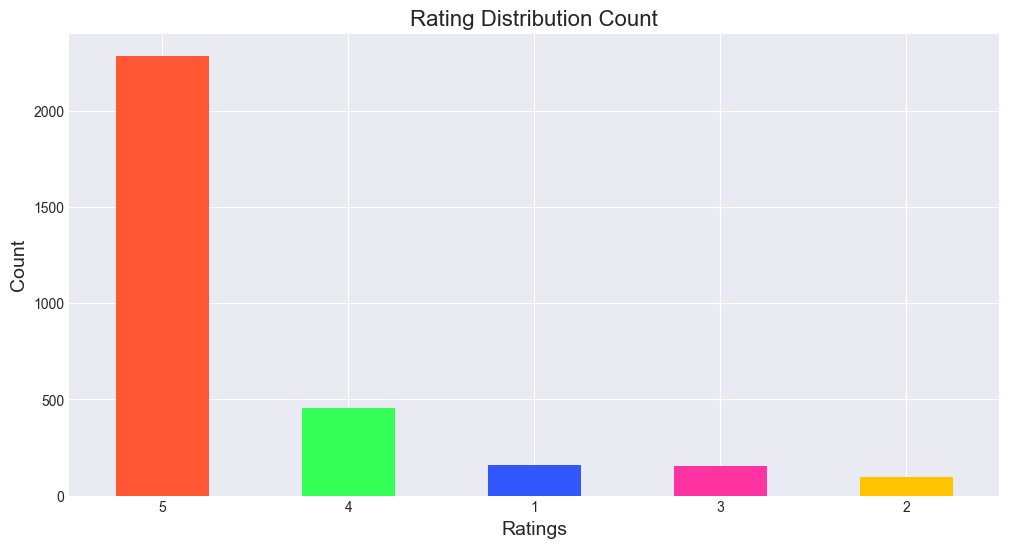

In [65]:
# Bar plot to visualize the total counts of each rating
rating_counts = df['rating'].value_counts()

# Using a bright color palette
colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1', '#FFC300']  # Hexadecimal color codes

rating_counts.plot.bar(color=colors)
plt.title('Rating Distribution Count', fontsize=16)
plt.xlabel('Ratings', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

In [66]:
#Finding the percentage distribution of each rating - we'll divide the number of records for each rating by total number of records

print(f"Rating value count - percentage distribution: \n{round(df['rating'].value_counts()/df.shape[0]*100,2)}")

Rating value count - percentage distribution: 
rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64


## Let's plot the above values in a pie chart 

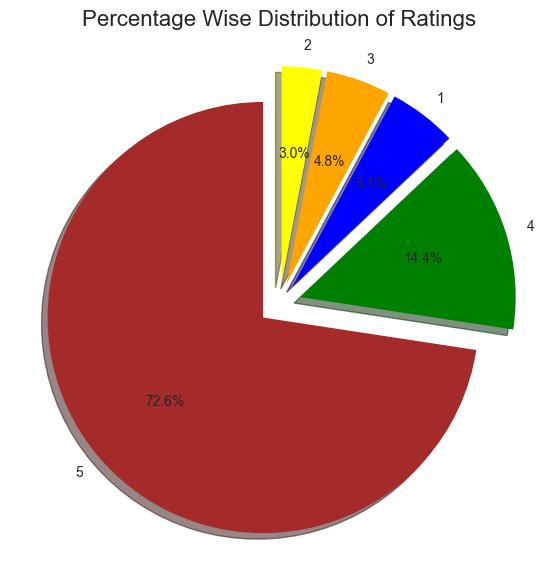

In [67]:
# Calculate the percentage distribution of ratings
tags = df['rating'].value_counts(normalize=True)

# Create a pie chart
plt.figure(figsize=(7, 7))
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=['brown', 'green', 'blue', 'orange', 'yellow'], startangle=90, explode=[0.1] * len(tags))

# Set the title and remove the y-label
plt.title('Percentage Wise Distribution of Ratings', fontsize=16)
plt.ylabel('')  # Hide the y-label
plt.show()

### Analyzing 'feedback' column

This column refers to the feedback of the verified review

In [68]:
#Distinct values of 'feedback' and its count 

print(f"Feedback value count: \n{df['feedback'].value_counts()}")

Feedback value count: 
feedback
1    2893
0     256
Name: count, dtype: int64


### There are 2 distinct values of 'feedback' present - 0 and 1. Let's see what kind of review each value corresponds to.

In [69]:
#Extracting the 'verified_reviews' value for one record with feedback = 0

review_0 = df[df['feedback'] == 0].iloc[1]['verified_reviews']
print(review_0)

Sound is terrible if u want good music too get a bose


In [70]:
#Extracting the 'verified_reviews' value for one record with feedback = 1

review_1 = df[df['feedback'] == 1].iloc[1]['verified_reviews']
print(review_1)

Loved it!


- From the above 2 examples we can see that feedback **0 is negative review** and **1 is positive review**.

### Let's plot the feedback value count in a bar graph

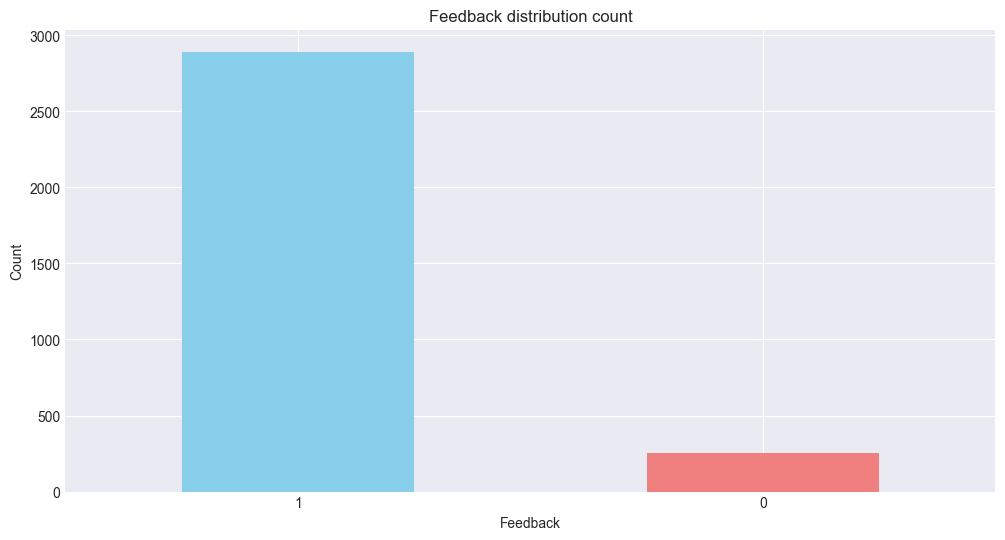

In [71]:
#Bar graph to visualize the total counts of each feedback

df['feedback'].value_counts().plot.bar(color=['skyblue','lightcoral'])
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

In [72]:
#Finding the percentage distribution of each feedback - we'll divide the number of records for each feedback by total number of records

print(f"Feedback value count - percentage distribution: \n{round(df['feedback'].value_counts()/df.shape[0]*100,2)}")

Feedback value count - percentage distribution: 
feedback
1    91.87
0     8.13
Name: count, dtype: float64


### Feedback distribution 
* 91.87% reviews are positive 
* 8.13% reviews are negative

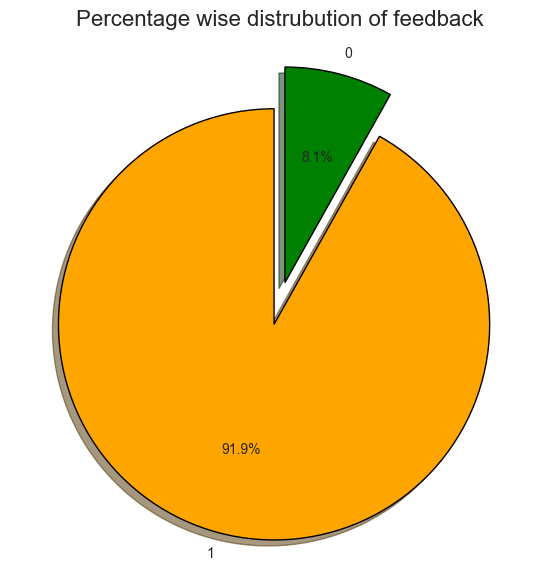

In [73]:
fig = plt.figure(figsize=(7,7))
colors = ('orange', 'green')
wp = {'linewidth':1, "edgecolor":'black'}
tags = df['feedback'].value_counts()/df.shape[0]
explode=(0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode)

# Set the title and remove the y-label
plt.title('Percentage wise distrubution of feedback', fontsize=16)
plt.ylabel('')  # Hide the y-label
plt.show()

Let's see the 'rating' values for different values of 'feedback'

In [74]:
#Feedback = 0
df[df['feedback'] == 0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [75]:
#Feedback = 1
df[df['feedback'] == 1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

If rating of a review is 1 or 2 then the feedback is 0 (negative) and if the rating is 3, 4 or 5 then the feedback is 1 (positive).

### Analyzing 'variation' column

This column refers to the variation or type of Amazon Alexa product. Example - Black Dot, Charcoal Fabric etc.

In [76]:
#Distinct values of 'variation' and its count 

print(f"Variation value count: \n{df['variation'].value_counts()}")

Variation value count: 
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


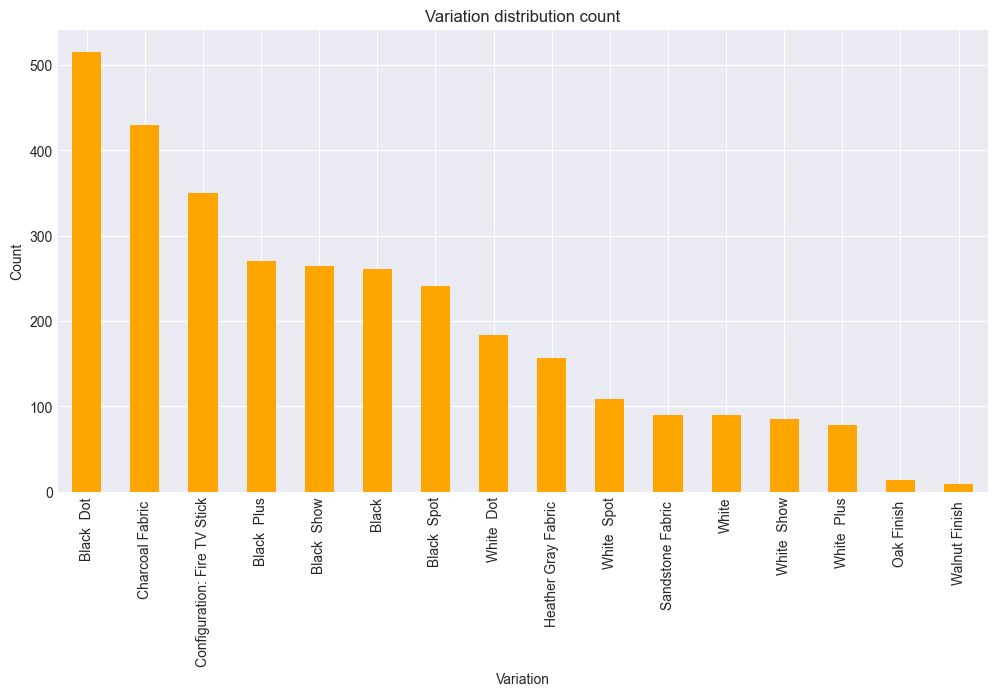

In [77]:
#Bar graph to visualize the total counts of each variation

df['variation'].value_counts().plot.bar(color = 'orange')
plt.title('Variation distribution count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

In [78]:
#Finding the percentage distribution of each variation - we'll divide the number of records for each variation by total number of records

print(f"Variation value count - percentage distribution: \n{round(df['variation'].value_counts()/df.shape[0]*100,2)}")

Variation value count - percentage distribution: 
variation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.99
White  Spot                      3.46
Sandstone Fabric                 2.86
White                            2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: count, dtype: float64


### Mean rating according to variation

In [79]:
df.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

### Let's analyze the above ratings

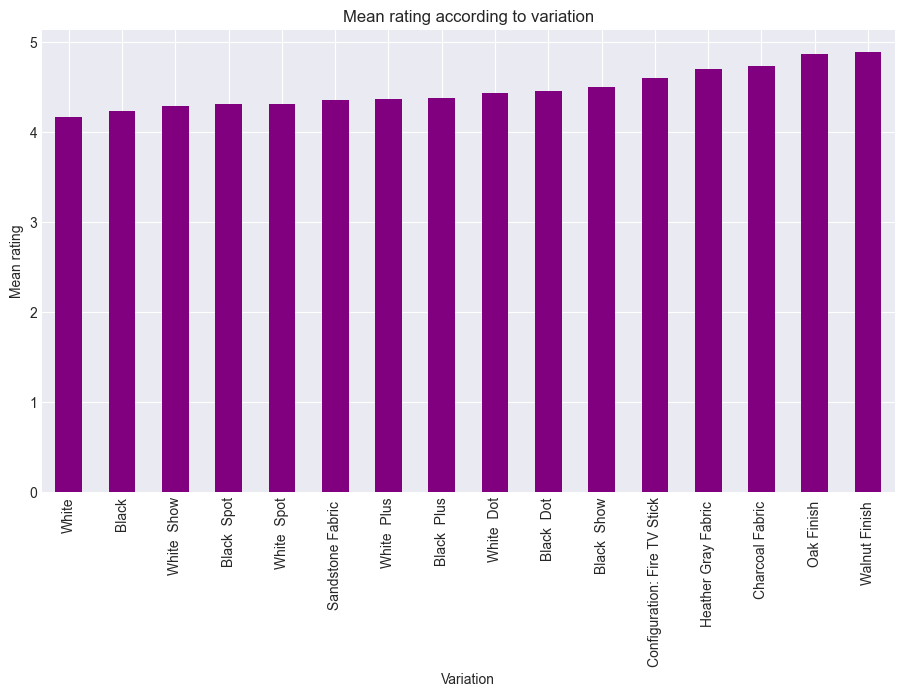

In [80]:
df.groupby('variation')['rating'].mean().sort_values().plot.bar(color = 'purple', figsize=(11, 6))
plt.title("Mean rating according to variation")
plt.xlabel('Variation')
plt.ylabel('Mean rating')
plt.show()

### Analyzing 'verified_reviews' column

This column contains the textual review given by the user for a variation for the product.

In [81]:
df['length'].describe()

count    3149.000000
mean      132.714513
std       182.541531
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

### Length analysis for full dataset

[Text(0.5, 1.0, 'Distribution of length of review ')]

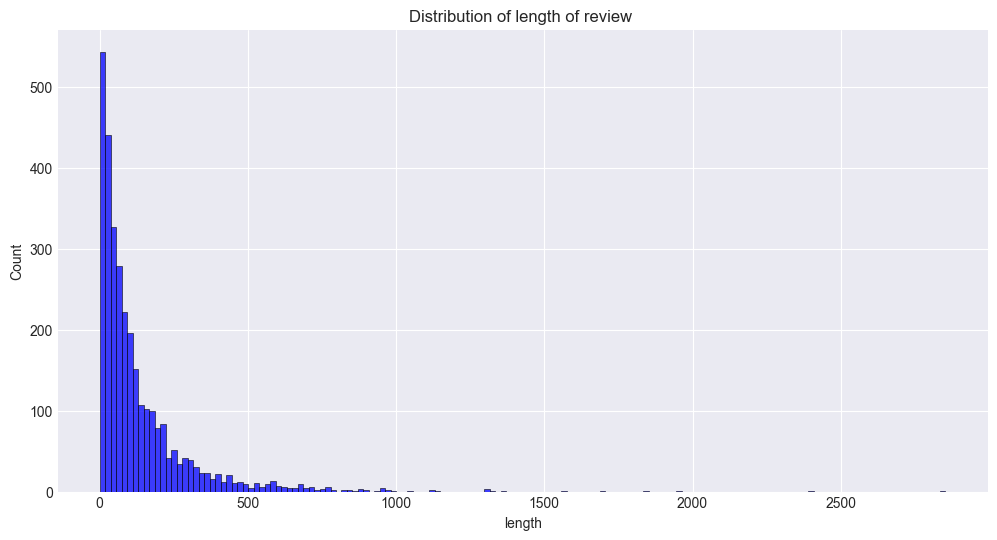

In [82]:
sns.histplot(df['length'],color='blue').set(title='Distribution of length of review ')

### Length analysis when feedback is 0 (negative).

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

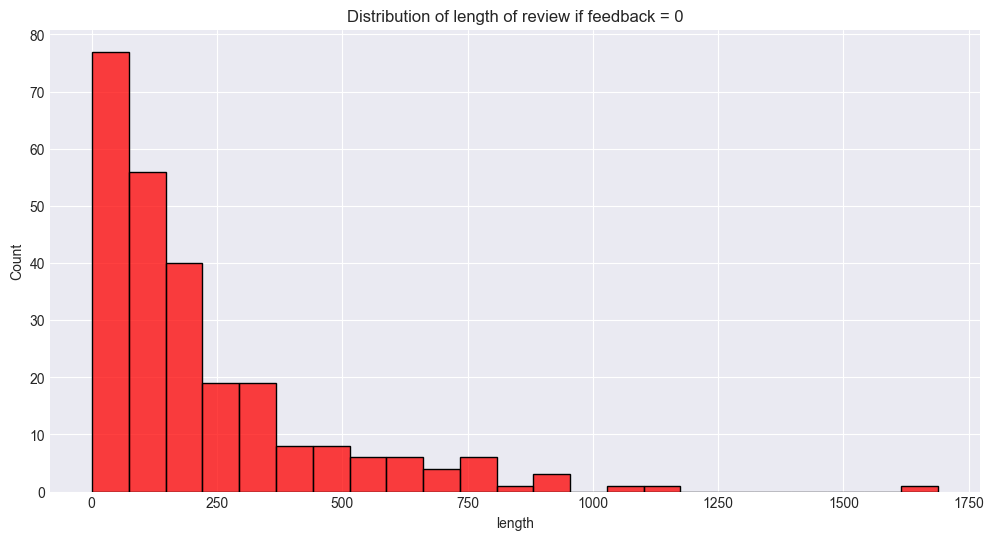

In [83]:
sns.histplot(df[df['feedback']==0]['length'],color='red').set(title='Distribution of length of review if feedback = 0')

### Length analysis when feedback is 1 (positive)

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 1')]

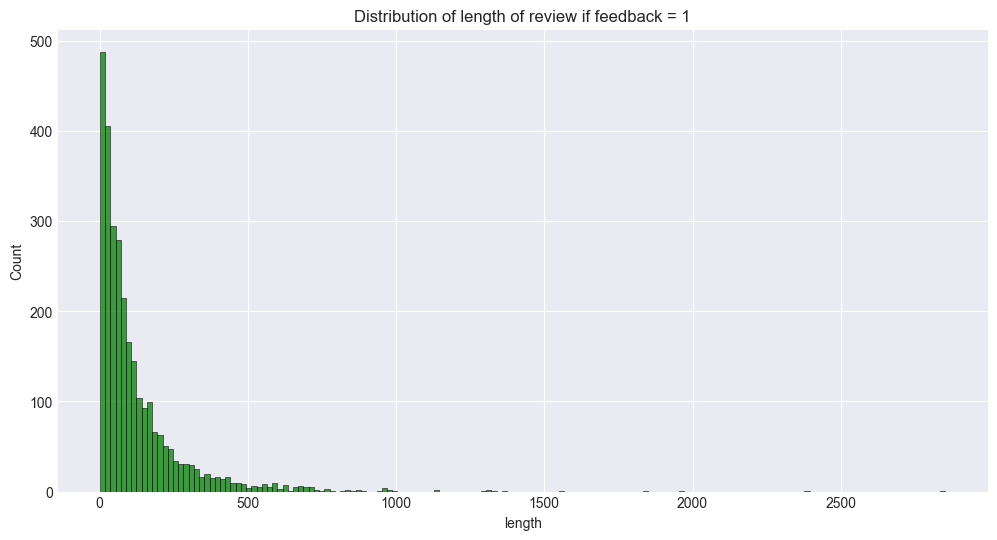

In [84]:
sns.histplot(df[df['feedback']==1]['length'],color='green').set(title='Distribution of length of review if feedback = 1')

### Lengthwise mean rating

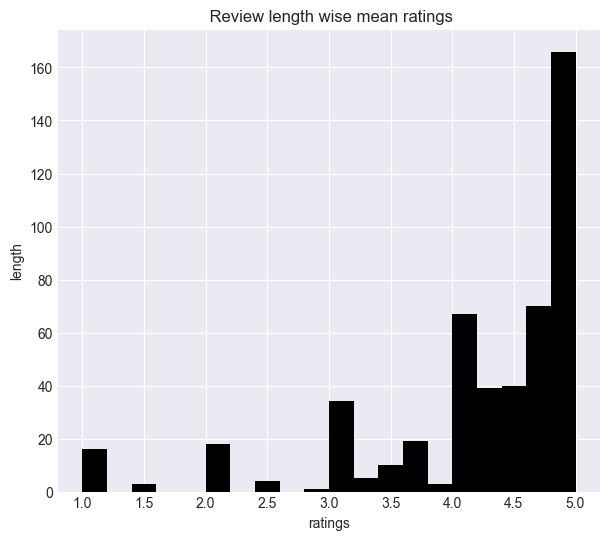

In [85]:
df.groupby('length')['rating'].mean().plot.hist(color = 'black', figsize=(7, 6), bins = 20)
plt.title(" Review length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel('length')
plt.show()

In [86]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(df.verified_reviews)

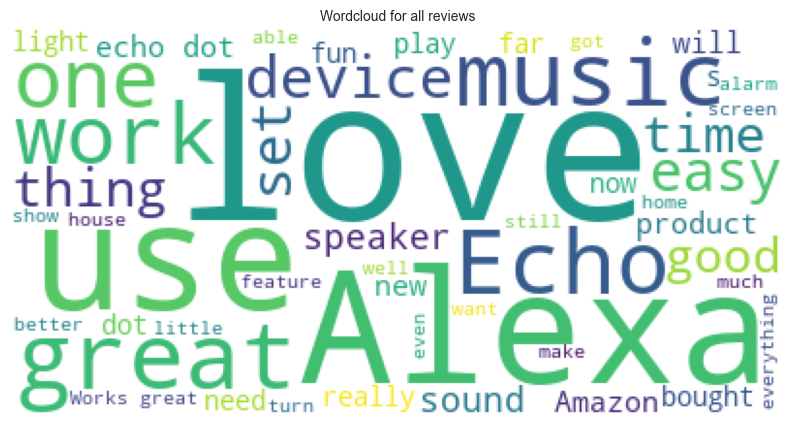

In [87]:
# Combine all reviews
reviews = " ".join([review for review in df['verified_reviews']])
                        
# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

### Lets find the unique words in each feedback category

In [88]:
# Combine all reviews for each feedback category and splitting them into individual words
neg_reviews = " ".join([review for review in df[df['feedback'] == 0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in df[df['feedback'] == 1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()

#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)


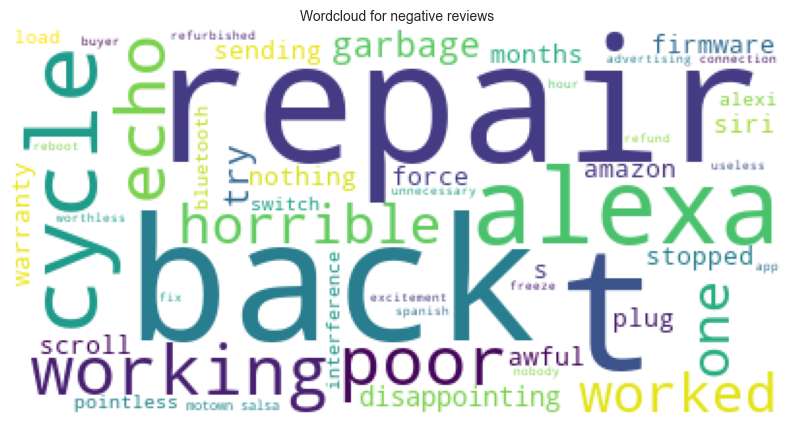

In [89]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

Negative words can be seen in the above word cloud - garbage, pointless, poor, horrible, repair etc

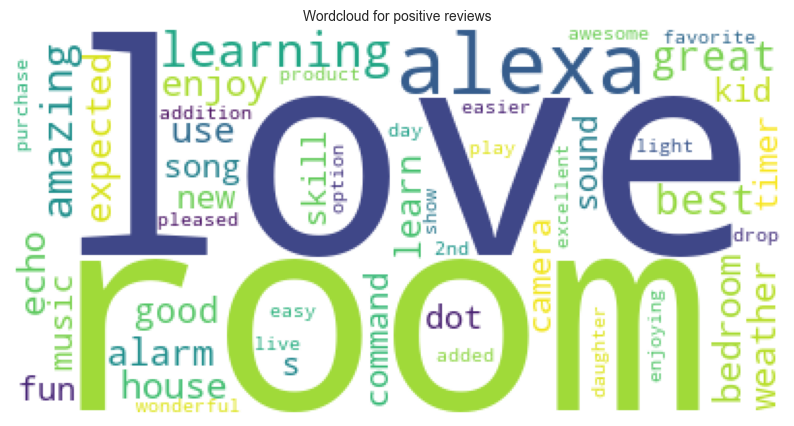

In [90]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()

Positive words can be seen in the above word cloud - good, enjoying, amazing, best, great etc

---
## Save the Processed Data
Save the dataset with engineered features.

In [91]:
save_location = '../data/feature_engineered_data/amazon_alexa.tsv'
os.makedirs(os.path.dirname(save_location), exist_ok=True)  # Ensure the directory exists
df.to_csv(save_location, index=False)